# Uber Case Study Using Python

### Step 1: importing commonly used libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Loading Dataset in python using Pandas:

In [3]:
# Reading Csv file of uber data using pandas:
uber_data = pd.read_csv("UberDataset.csv")

In [4]:
# Checking Quick overview of data using head():
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
# Checking its shape:
uber_data.shape

(1156, 7)

In [6]:
# Checking its info like data type & non null values in data
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### Step 3: Data Preprocessing:

#### (a). Checking & filling null values

In [7]:
# Checking Null values in data:
uber_data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [8]:
# So in uber data 'PURPOSE' column have null values so we will replace it with 'No Value':
uber_data['PURPOSE'] = uber_data['PURPOSE'].fillna("No Value")

#### (b). checking data types & correcting where needed:

In [9]:
# checking data types of columns:
uber_data.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [10]:
# So we have 'START_DATE' & 'END_DATE' as Object. we want to make its data type as 'DATE TIME'
# Convert with error handling
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce')
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], errors='coerce')

In [11]:
uber_data.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [12]:
# Quick Overview of data:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,No Value
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#### (c). making date & time column:

In [13]:
# making date & time column seprately using datetime module:
from datetime import datetime
# Making start date column:
uber_data['Date'] = pd.DatetimeIndex(uber_data['START_DATE']).date

In [14]:
# Ensure START_DATE is in datetime format
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'])

# Extract the start time (hour)
uber_data['Start_Time'] = uber_data['START_DATE'].dt.hour

#### (d). Make a column related to Categorize Time like (morning, after_noon, evening, night):

In [15]:
def Categorize_time(hour):
    if 0<= hour <= 12:
        return 'Morning'
    elif 12 < hour <= 16:
        return 'After Noon'
    elif 16 < hour < 20:
        return 'Evening'
    else:
        return 'Night'
# Create a new column 'Time_of_Day'
uber_data['Time_of_Day'] = uber_data['Start_Time'].apply(Categorize_time)

#### (e). Creting 'Month' & 'Week' Name Column

In [16]:
# Creating Month Column:
# Extracting month from start date:
uber_data['Month'] = pd.DatetimeIndex(uber_data['START_DATE']).month
# Replacing Month Num with its actual name:
month_label = {1.0:'Jan', 2.0:'Feb', 3.0:'Mar', 4.0:'Apr',
              5.0 : 'May', 6.0:'Jun', 7.0:'Jul', 8.0:'Aug',
              9.0:'Sep', 10.0:'Oct', 11.0:'Nov', 12.0:'Dec'}
uber_data['Month'] = uber_data.Month.map(month_label)

In [17]:
# Creating Week Name Column:
# Extracting day from start date:
uber_data['Day'] = uber_data.START_DATE.dt.weekday
# Replacing day num with its actual name
day_label = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
uber_data['Day'] = uber_data.Day.map(day_label)

In [18]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Start_Time,Time_of_Day,Month,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,No Value,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,After Noon,Jan,Wed


In [19]:
# Now removing not needed black values:
uber_data.dropna(inplace = True)

### Step 4: Data Analysis:

#### Que 1: In which category do people book the most Uber rides?

In [20]:
category_count = uber_data.groupby('CATEGORY').size()
category_count = category_count.sort_values(ascending=False)
print(category_count)

CATEGORY
Business    407
Personal     13
dtype: int64


#### Que 2: For which purpose do people book Uber rides the most?

In [21]:
purpose_count = uber_data.groupby('PURPOSE').size()
purpose_count = purpose_count.sort_values(ascending=False)
print(purpose_count)

PURPOSE
No Value           159
Meeting             81
Meal/Entertain      64
Errand/Supplies     47
Customer Visit      46
Temporary Site      14
Between Offices      9
dtype: int64


#### Que 3: At what time do people book cabs the most from Uber?

In [22]:
preferred_time = uber_data.groupby('Time_of_Day').size()
preferred_time = preferred_time.sort_values(ascending = False)
print(preferred_time)

Time_of_Day
After Noon    131
Morning       115
Evening       103
Night          71
dtype: int64


#### Que 4:In which month do people book Uber rides less frequently?

In [23]:
# Less Frequently uber Rides
less_frequent_month = uber_data.groupby('Month').size()
less_frequent_month = less_frequent_month.sort_values(ascending = True)
less_frequent_month

Month
Sep    13
Jan    23
Oct    24
Apr    25
May    26
Dec    39
Jul    40
Feb    40
Jun    42
Mar    42
Aug    43
Nov    63
dtype: int64

#### Que 5:On which day of the week do people book Uber rides the most?

In [24]:
most_ride_day = uber_data.groupby('Day').size()
most_ride_day = most_ride_day.sort_values(ascending = False)
most_ride_day

Day
Fri    87
Mon    62
Thu    61
Tue    60
Sat    52
Wed    50
Sun    48
dtype: int64

#### Que 6:How many miles do people usually book a cab for through Uber?

In [51]:
# genrate summary stastics of MILES column:
Miles_info = uber_data['MILES'].describe()
Miles_info

count    420.000000
mean       9.083810
std       16.386685
min        0.500000
25%        2.775000
50%        5.700000
75%        9.900000
max      174.200000
Name: MILES, dtype: float64

### Step 5: Data Visulizations:

#### Que 1: In which category do people book the most Uber rides?
#### Que 2: For which purpose do people book Uber rides the most?

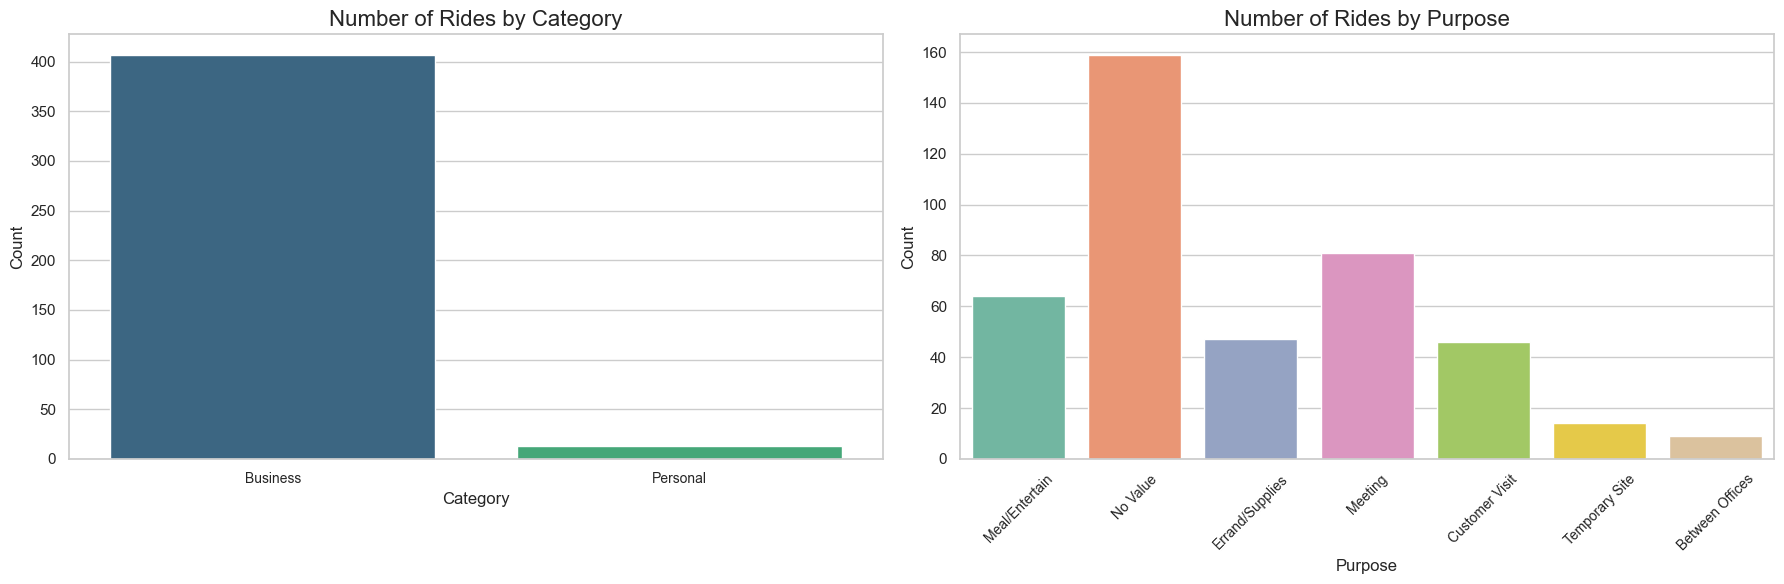

In [39]:
# Set a theme for the charts
sns.set_theme(style="whitegrid")

# Set the figure size
plt.figure(figsize=(18, 6))

# First subplot: Category distribution
plt.subplot(1, 2, 1)
sns.countplot(data=uber_data, x='CATEGORY', hue='CATEGORY', palette='viridis', dodge=False, legend=False)
plt.title('Number of Rides by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)

# Second subplot: Purpose distribution with multiple colors
plt.subplot(1, 2, 2)
sns.countplot(data=uber_data, x='PURPOSE', hue='PURPOSE', palette='Set2', dodge=False, legend=False)
plt.title('Number of Rides by Purpose', fontsize=16)
plt.xlabel('Purpose', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

#### Que 3: At what time do people book cabs the most from Uber?

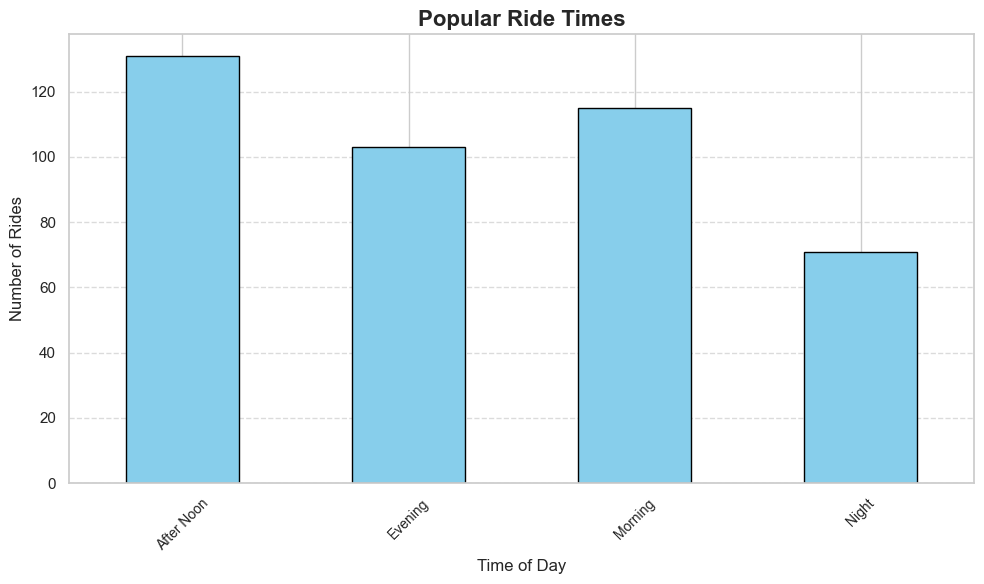

In [40]:
# Group data by Time_of_Day and count occurrences
preferred_time = uber_data.groupby('Time_of_Day').size()

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Set figure size
preferred_time.plot(kind='bar', color='skyblue', edgecolor='black', title='Popular Ride Times')

# Add labels and title
plt.title('Popular Ride Times', fontsize=16, fontweight='bold')
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)

# Enhance x-axis readability
plt.xticks(rotation=45, fontsize=10)

# Add gridlines for better visual alignment
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


#### Que 4:In which month do people book Uber rides less frequently?

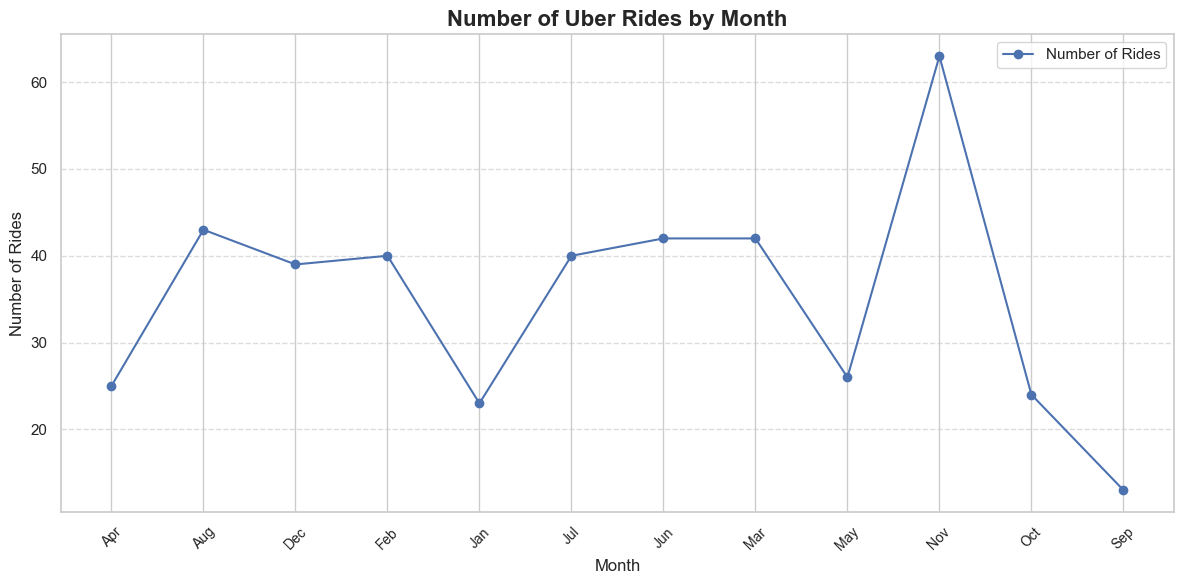

In [41]:
# Group by 'Month' and count the rides, setting observed=True to avoid the warning
less_frequent_month = uber_data.groupby('Month', observed=True).size()

# Plot the Less Frequent Months:
plt.figure(figsize=(12, 6))
plt.plot(less_frequent_month.index, less_frequent_month.values, marker='o', linestyle='-', color='b', label='Number of Rides')
plt.title('Number of Uber Rides by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate month labels for better visibility
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Que 5:On which day of the week do people book Uber rides the most?

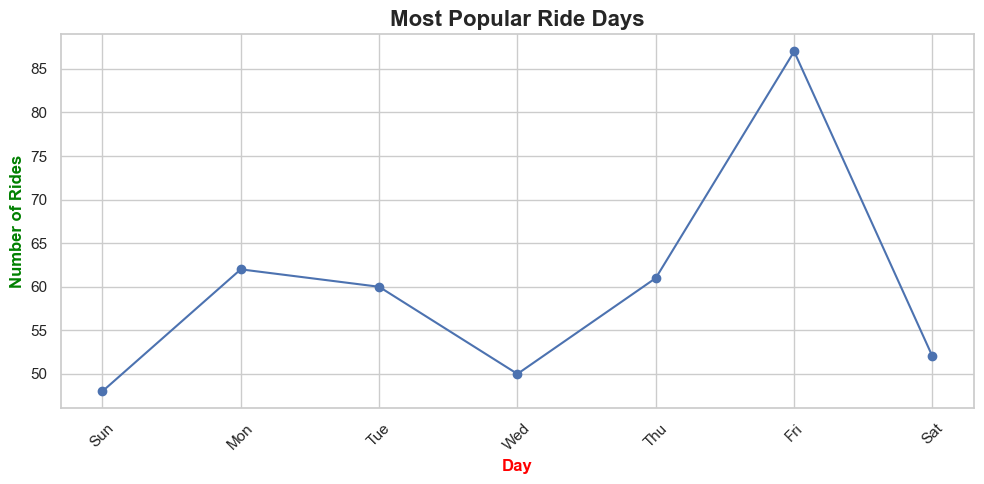

In [42]:
# Step 1: Define the order of days (starting from Sunday)
day_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# Step 2: Tell pandas to treat 'Day' as a custom ordered category
uber_data['Day'] = pd.Categorical(uber_data['Day'], categories=day_order, ordered=True)

# Step 3: Group by 'Day' and count the rides
popular_ride_day = uber_data.groupby('Day', observed = True).size()

# Step 4: Plot the data
plt.figure(figsize=(10, 5))
popular_ride_day.plot(marker='o', linestyle='-', color='b')  # Line plot with dots
plt.title('Most Popular Ride Days', fontsize = 16, fontweight = 'bold')
plt.xlabel('Day', fontsize = 12, fontweight = 'bold', color ='red')
plt.ylabel('Number of Rides', fontsize = 12, fontweight = 'bold', color = 'green')
plt.xticks(rotation=45)  # Rotate the day names for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


#### Que 6:How many miles do people usually book a cab for through Uber?

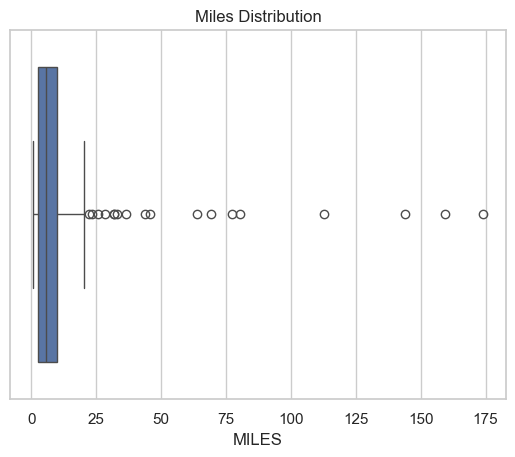

In [43]:
# Ploting Miles Through BOX Plot:
sns.boxplot(data=uber_data, x='MILES')
plt.title('Miles Distribution')
plt.show()

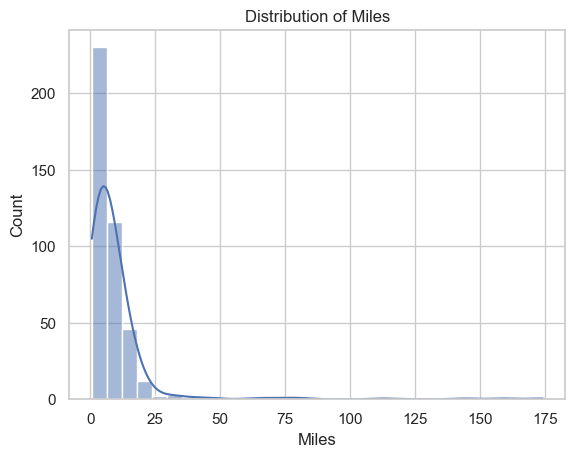

In [49]:
# Ploting Miles Through Histogram for better understanding:
sns.histplot(uber_data['MILES'], kde=True, bins=30)
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.show()

In [54]:
uber_data.to_csv('Uber_Data.csv', index=False)